## Analyzing Airbnb listing in Paris (Maven Analytics)

* calculate basic profiling metrics, \
* change column datatypes as necessary, \
* filter down to only Paris Listings. 

### Objective 1: Data prep and QA
- 1) Import/Open the Listings.csv file:
- 2) Cast any date columns as a datetime format:
- 3) Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’
- 4) QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) Import/Open the Listings.csv file:

In [2]:
# reading data into a data frame:

df_listing = pd.read_csv('./Data/Listings.csv',encoding='iso-8859-1',low_memory=False)
df_listing.head(10)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
5,4898654,NEW - Charming apartment Le Marais,505535,2011-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
6,6021700,2P - Entre Bastille et Republique,8053690,2013-08-09,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
7,6945740,57sqm btw. Bastille & PÃÂ¨re Lachaise,5924709,2013-04-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
8,7491966,Charming appartment near the Parc Buttes Chaumont,35812762,2015-06-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
9,7849932,Bel appartement plein de charme !,20833291,2014-09-02,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


2) Cast any date columns as a datetime format:

In [3]:
df_listing.shape

(279712, 33)

In [4]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [5]:
# is "host_response_time" a datetime type?
df_listing['host_response_time'].unique()

array([nan, 'within a few hours', 'within a day', 'within an hour',
       'a few days or more'], dtype=object)

In [6]:
# fixing type of the column for those that are of type datetime
df_listing['host_since'] = pd.to_datetime(df_listing['host_since'])
df_listing['host_since'].dtype

dtype('<M8[ns]')

3) Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

In [7]:
# one way:
#temp = df_listing[df_listing['city']=='Paris']
#df_paris = temp.loc[:,['host_since','city','neighbourhood','accommodates','price']]
# another way:
df_paris = (df_listing
            .query("city=='Paris'")
            .loc[:,['host_since','city','neighbourhood','accommodates','price']])

df_paris.head()

,host_since,city,neighbourhood,accommodates,price
0,2011-12-03,Paris,Buttes-Montmartre,2,53
1,2013-11-29,Paris,Buttes-Montmartre,2,120
2,2014-07-31,Paris,Elysee,2,89
3,2013-12-17,Paris,Vaugirard,2,58
4,2014-12-14,Paris,Passy,2,60


In [8]:
df_paris.shape

(64690, 5)

4) QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [9]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   city           64690 non-null  object        
 2   neighbourhood  64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [10]:
# another method:
df_paris.isna().sum()

host_since       33
city              0
neighbourhood     0
accommodates      0
price             0
dtype: int64

Number of null values are very low that don't change statistics significantly. So we do not need to remove them necessarily.

In [11]:

# only host_since column has null values and there are not so many of them.
# so we'll remove those records entirely

"""
df_paris.dropna(inplace=True)
df_paris.info()
"""

'\ndf_paris.dropna(inplace=True)\ndf_paris.info()\n'

In [12]:
# finding mean, max, avg for numeric fields:
df_paris.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


Min of Price and Accomodates is zero, which does not seem correct. We will take a closer look at these values

In [13]:
df_paris.query("price==0" or "accomodates==0").count()

host_since       62
city             62
neighbourhood    62
accommodates     62
price            62
dtype: int64

### Objective 2: Prepare data for visualization

* 1) Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high) 
* 2) Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)
* 3) Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [14]:
# 1) 
# table of mean price for different neighbourhoods
paris_listings_neighbourhood = (df_paris
                                .groupby(['neighbourhood'])
                                .agg({'price':'mean'})
                                .sort_values('price')
                                .reset_index())
paris_listings_neighbourhood

,neighbourhood,price
0,Menilmontant,74.942257
1,Buttes-Chaumont,82.690182
2,Buttes-Montmartre,87.209479
3,Reuilly,89.058402
4,Popincourt,90.559459
5,Gobelins,98.110184
6,Observatoire,101.866801
7,Batignolles-Monceau,102.612702
8,Enclos-St-Laurent,102.967156
9,Vaugirard,106.831330


In [15]:
# 2) 
# price as a function of accomodations for the most expensive neighbourhood
most_expnsive_neighbourhood = paris_listings_neighbourhood.iloc[-1].loc['neighbourhood']
print(most_expnsive_neighbourhood)


Elysee


In [16]:
paris_listings_accomodations = (df_paris
                                .query("neighbourhood==@most_expnsive_neighbourhood")
                                .groupby(['accommodates'])
                                .agg({'price':'mean','neighbourhood':'count'})
                                .sort_values('price')
                                .reset_index()
                               )
paris_listings_accomodations

,accommodates,price,neighbourhood
0,0,0.000000,6
1,1,79.522222,90
2,3,152.828767,146
3,2,155.103352,716
4,4,212.096070,458
5,5,328.817073,82
6,6,355.508571,175
7,8,405.518519,27
8,7,411.538462,26
9,9,440.272727,11


Accomodation for 16 people is less expensive compared to 14 people. But when we look at the number of data points we have this issue can be explained: there are simply not enough data points to get an accurate estimate. 

In [17]:
# 3)
paris_listings_over_time = (df_paris
                            .groupby(df_paris['host_since'].dt.year)
                            .agg({'price':'mean'})
                            .reset_index()
                           )
paris_listings_over_time

,host_since,price
0,2008.0,77.750000
1,2009.0,159.641509
2,2010.0,125.031250
3,2011.0,124.828230
4,2012.0,111.578615
5,2013.0,107.096414
6,2014.0,100.253800
7,2015.0,103.646250
8,2016.0,114.159847
9,2017.0,108.658888


In [18]:
year_range = np.arange(2008,2022,1)
year_range

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [19]:
num_new_hosts = []
for yr in year_range:
    num_new_hosts.append((df_paris['host_since'].dt.year==yr).sum())
num_new_hosts
paris_listings_over_time['num_new_hosts'] = num_new_hosts
paris_listings_over_time

,host_since,price,num_new_hosts
0,2008.0,77.750000,4
1,2009.0,159.641509,106
2,2010.0,125.031250,416
3,2011.0,124.828230,1339
4,2012.0,111.578615,4592
5,2013.0,107.096414,8142
6,2014.0,100.253800,10922
7,2015.0,103.646250,12147
8,2016.0,114.159847,8871
9,2017.0,108.658888,4585


In [20]:
# another method: using resample function for dataframe with datetime index
'''
paris_listings_over_time = (df_paris
                            .set_index('host_since')
                            .resample('Y')
                            .agg({'neighbourhood':'count', 'price':'mean'}))
                            
paris_listings_over_time.rename(columns={'neighbourhood':'num_new_host'},inplace=True)
paris_listings_over_time

'''

"\nparis_listings_over_time = (df_paris\n                            .set_index('host_since')\n                            .resample('Y')\n                            .agg({'neighbourhood':'count', 'price':'mean'}))\n                            \nparis_listings_over_time.rename(columns={'neighbourhood':'num_new_host'},inplace=True)\nparis_listings_over_time\n\n"

### Objective 3: Visualize the data and summarize findings
* 1) Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed
* 2) Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed
* 3) Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed
* 4) Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?
* 5) BONUS: Create a dual axis line chart to show both new hosts and average price over time

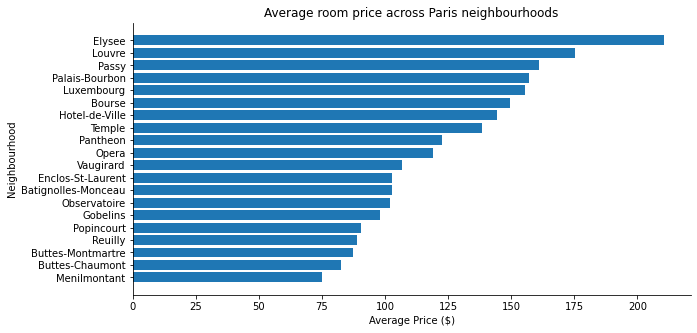

In [43]:
# 1)
fig,ax = plt.subplots(figsize=(10,5))
ax.barh(paris_listings_neighbourhood['neighbourhood'],paris_listings_neighbourhood['price'])
ax.set_xlabel('Average Price (Euros)')
ax.set_ylabel('Neighbourhood')
ax.set_title('Average room price across Paris neighbourhoods');

sns.despine()
#paris_listings_neighbourhood.plot(x='neighbourhood',y='price',kind='barh',figsize=(10,5))


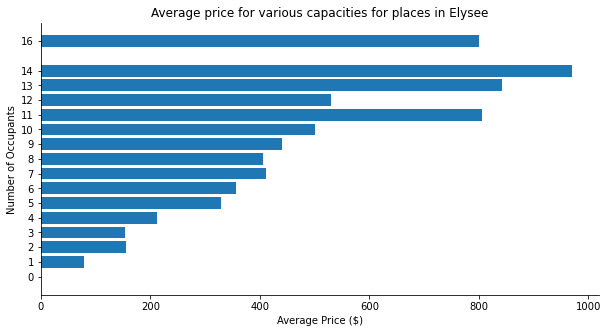

In [45]:
# 2) 
fig,ax = plt.subplots(figsize=(10,5))
ax.barh(paris_listings_accomodations['accommodates'],paris_listings_accomodations['price'])
ax.set_xlabel('Average Price ($)')
ax.set_ylabel('Number of Occupants')
ax.set_yticks(paris_listings_accomodations['accommodates'].unique())
ax.set_title('Average price for various capacities for places in Elysee');

sns.despine()

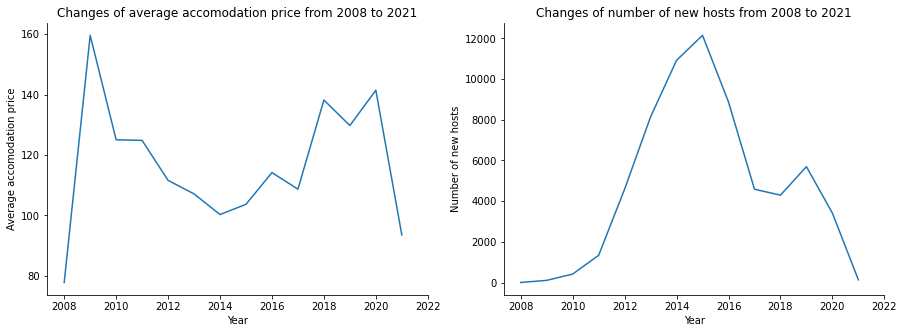

In [63]:
# 3) and 4) :
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(paris_listings_over_time['host_since'], paris_listings_over_time['price'])
ax[0].set_xlabel('Year')
ax[0].set_xticks(np.arange(2008,2024,2))
ax[0].set_ylabel('Average accomodation price')
#ax[0].set_ylim(bottom=0,top=max(paris_listings_over_time['price'])+10)
ax[0].set_title('Changes of average accomodation price from 2008 to 2021');
sns.despine()

ax[1].plot(paris_listings_over_time['host_since'], paris_listings_over_time['num_new_hosts'])
ax[1].set_xlabel('Year')
ax[1].set_xticks(np.arange(2008,2024,2))
ax[1].set_ylabel('Number of new hosts')
#ax[1].set_ylim(bottom=0,top=max(paris_listings_over_time['num_new_hosts'])+1000)
ax[1].set_title('Changes of number of new hosts from 2008 to 2021');
sns.despine()

It is clear that after 2015 regulations the number of new hosts has dropped increasintly over time. But the average price of the accomodations show a slight increase which is probably because number of hosts decreased. 

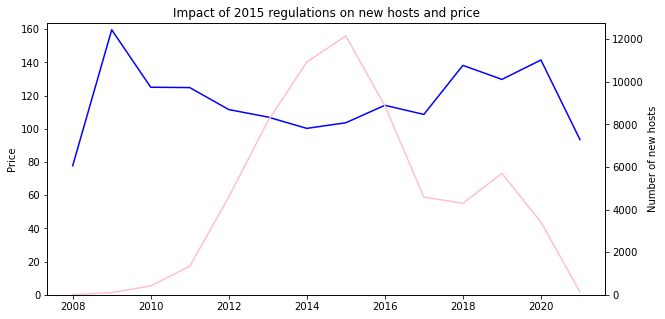

In [61]:
# Bonus:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(paris_listings_over_time['host_since'], 
        paris_listings_over_time['price'],
        'b');
ax.set_ylim(0)
ax.set_ylabel('Price')

ax2 = ax.twinx()
ax2.plot(paris_listings_over_time['host_since'],
        paris_listings_over_time['num_new_hosts'],
        'pink');
ax2.set_ylim(0)
ax2.set_ylabel('Number of new hosts');

ax2.set_title('Impact of 2015 regulations on new hosts and price');

In [62]:
# Bonus:
'''
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(paris_listings_over_time['host_since'], paris_listings_over_time['price'],'b',
       paris_listings_over_time['host_since'], paris_listings_over_time['num_new_hosts']/100,'r');

ax.set_xlabel('Year')
ax.legend(['price','number of new hosts (*0.01)'])
#ax.set_yticks(paris_listings_accomodations['accommodates'].unique())
ax.set_title('Changes in price and number of new hosts from 2008 to 2021');
'''

"\nfig,ax = plt.subplots(figsize=(10,5))\nax.plot(paris_listings_over_time['host_since'], paris_listings_over_time['price'],'b',\n       paris_listings_over_time['host_since'], paris_listings_over_time['num_new_hosts']/100,'r');\n\nax.set_xlabel('Year')\nax.legend(['price','number of new hosts (*0.01)'])\n#ax.set_yticks(paris_listings_accomodations['accommodates'].unique())\nax.set_title('Changes in price and number of new hosts from 2008 to 2021');\n"